# ECON 323: Final Project: UFC Fight Visualizer
## Jake Bradbeer, 69191252

Welcome to my final project for ECON 323, to read about how to use or interpret the dashboard, use the README.md on the public GitHub repo, [here](https://github.com/JBradbeer/econ323_ufc_fight_summary)


In [1]:
grey = '#F7F7F7'
red0 = '#E32934'
blu0 = '#004883'
gold = '#FFD700'

**Imports**

In [2]:
# You may need to pip install panel unless you already have it downloaded
# !pip install panel

In [3]:
import math
import warnings
import panel as pn
import pandas as pd
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.lines as lines
# from mpldatacursor import datacursor
from ipywidgets import *

In [4]:
warnings.filterwarnings('ignore')
pn.extension()

**Read CSVs to Pandas**

In [5]:
# dataframe for fight info
df_f = pd.read_csv('https://github.com/JBradbeer/econ323_ufc_fight_summary/raw/main/data/fights_f.csv', 
                   index_col=0, engine='python')

# dataframe for red fighter info
df_r = pd.read_csv('https://github.com/JBradbeer/econ323_ufc_fight_summary/raw/main/data/fights_r.csv', 
                   index_col=0, engine='python')

# dataframe for blue fighter info
df_b = pd.read_csv('https://github.com/JBradbeer/econ323_ufc_fight_summary/raw/main/data/fights_b.csv', 
                   index_col=0, engine='python')

# # dataframe for uncleaned fights
# df_all = pd.read_csv('/home/jupyter/ECON 323/Final Project/Data/ufc-master.csv',
#                      index_col=0, engine='python', sk)

**Create top banner**

In [6]:
def create_top_banner(): 
    def title():
        '''
        creates the general title info for this fight including fighter names and rank, fight date, 
        location, date, weight, and length
        '''
        # create fight title
        def clean_rank(rank):
            if math.isnan(rank): return "NR"
            elif rank == 0:      return "Champion"
            else:                return int(rank)
        
        names = []
        for x in [r, b]:
            names.append(f"{x['fighter']} ({clean_rank(x['rank'])})")
            
        fight_title = f"{names[0]} vs. {names[1]}"
       
        # change number to rounds to 'title fight' if fight is a championship fight
        if f['title_bout']:
            rounds_text = "Title Fight"
        else:
            rounds_text = f"{f['no_of_rounds']} Round Fight"

        # create fight subtitle
        fight_subtitle1  = f"{f['location']} | {f['date']}"
        fight_subtitle2  = f"{f['weight_class']} | {rounds_text}"
    
        # display general fight details
        fig.text(m_center, 0.975, fight_title, fontsize=25, ha='center');
        fig.text(m_center, 0.955, fight_subtitle1, fontsize=15, ha='center');
        fig.text(m_center, 0.935, fight_subtitle2, fontsize=15, ha='center');
        
              
    def name_cards():
        # create name card for the blue fighter
        b_record = f"{int(b['wins'])} - {int(b['losses'])} - {int(b['draw'])}"
        
        fig.text(b_center, 0.910, b['odds'],    fontsize=15, ha='center');
        fig.text(b_center, 0.890, b['fighter'], fontsize=15, ha='center', color=blu0);
        fig.text(b_center, 0.870, b_record,     fontsize=15, ha='center');

        # create name card for the red fighter
        r_record = f"{int(r['wins'])} - {int(r['losses'])} - {int(r['draw'])}"
        
        fig.text(r_center, 0.910, r['odds'],    fontsize=15, ha='center');
        fig.text(r_center, 0.890, r['fighter'], fontsize=15, ha='center', color=red0);
        fig.text(r_center, 0.870, r_record,     fontsize=15, ha='center');
            
            
    def finish_details():
        '''
        Create the finish details section of the top banner
        '''
        
        if f['finish'] == 'KO/TKO' or f['finish_details'] == 'SUB':
            type_method = f"{f['finish']} ({f['finish_details']})"
        else:
            type_method = f"{f['finish']}"
            
        round_time  = f"{f['finish_round_time']} (Round: {int(f['finish_round'])})"
        fig.text(m_center, 0.890, round_time,  fontsize=15, color='black', ha='center');
        fig.text(m_center, 0.870, type_method, fontsize=15, color='black', ha='center');

        # create directional arrows denoting winner
        shift = 0.15
        if f['winner'] == 'Red':
            fig.text(m_center-shift, 0.88, '»', fontsize=40, color=red0, ha='center', rotation=180);
        elif f['winner'] == 'Blue':
            fig.text(m_center+shift, 0.88, '»', fontsize=40, color=blu0, ha='center');
        else:
            fig.text(m_center+shift, 0.88, '»', fontsize=40, ha='center');
            fig.text(m_center-shift, 0.88, '»', fontsize=40, ha='center', rotation=180);
            
            
    def fighter_stats():
        '''
        Create and populate the fighter statistics section of the top banner
        '''
        # populate the fighter'stats
        def style(c):
            if c['win_by_KO/TKO'] >= c['win_by_Submission']:
                return 'Striker'
            else:
                return 'Grappler'

        def feet(cms):
            inches = cms * 0.393701
            ft = math.floor(inches/12)
            inc = int(inches - ft*12)
            return f'{ft}\' {inc}\"'

        # create fighter stats header and stat type names
        height = 0.81
        fig.text(m_center, height, 'Fighter Stats',  fontsize=17, ha='center');
        
        box = ax[0][0].get_position()
        stats = ['Style', 'Stance', 'Age', 'Height', 'Reach']
        
        for i, stat in enumerate(reversed(stats)):
            height = box.y0 + (box.y1 - box.y0) * (i/len(stats))
            fig.text(m_center, height, stat,  fontsize=13, ha='center');
        
        # populate fighter statistics for each fighter
        for fighter in [r, b]:
            if fighter == r:
                align = lm_center

            else:
                align = rm_center
                
            stats_vals = [style(fighter), fighter['Stance'], fighter['age'], feet(fighter['Height_cms']),
                         feet(fighter['Reach_cms'])]    
                
            for i, val in enumerate(reversed(stats_vals)):
                height = box.y0 + (box.y1 - box.y0) * (i/len(stats))
                fig.text(align, height, val, fontsize=13, ha='center');
                

    title()
    name_cards()
    finish_details()
    fighter_stats()

**Create graphs**

In [7]:
def make_grappling_plot(x, row):
    if x == r:
        col = 0
        align = lm_center
        colors = [red0, grey]
    
    else:
        col = 1
        align = rm_center
        colors = [blu0, grey]
        
    
    # create text allignments
    box = ax[row][col].get_position()
    a_height = box.y1 - 0.05
    b_height = a_height - 0.04
    c_height = b_height - 0.04
    d_height = c_height - 0.04
    
    m_height = (box.y1 + box.y0)/2
    m_width  = (box.x1 + box.x0)/2
    
    # make data descriptors
    fig.text(m_center, a_height, 'Grappling', fontsize=17, ha='center');
    fig.text(m_center, b_height, 'TD Landed',    fontsize=13, ha='center');
    fig.text(m_center, c_height, 'TD Attempted', fontsize=13, ha='center');
    fig.text(m_center, d_height, 'SUB Attempted', fontsize=13, ha='center');

    # plot fighter take down stats
    fig.text(align, b_height,   int(x['td_landed']),           fontsize=13, ha='center');
    fig.text(align, c_height,   int(x['td_attempted']),        fontsize=13, ha='center');
    fig.text(m_width, m_height, str(int(x['td_pct']*100))+'%', fontsize=13, ha='center');
    fig.text(align, d_height, int(x['sub_attempts']), fontsize=13, ha='center');
    
    # plot takedown graph
    td = [x['td_pct'], 1-x['td_pct']] 
    ax[row][col].pie(x=td, colors=colors, wedgeprops=dict(width=0.3), startangle=90)



In [8]:
def make_striking_plot(x, row):
    '''
    Takes in the dictionary of the specified fighter, x, and the row that the plot should be in
    and creastes the striking plot for the specified fighter in the specified row
    '''
    
    if x == r:
        col = 0
        align = 0.4
        h_align = 'left'
        color = red0
    
    else:
        col = 1
        align = 0.6
        h_align = 'right'
        color = blu0,
        
    bar_height = 0.6
    
    ax_st = ax[row][col].twiny()
    lims = [r['tot_str_attempted'], b['tot_str_attempted']]
    
    if x == r:
        land = [0, -x['sig_str_landed'], -x['tot_str_landed'], 0]
        atpt = [0, -x['sig_str_attempted'], -x['tot_str_attempted'], 0]
        kd   = [-x['kd'], 0, 0, 0]
        ax_st.set_xlim(-max(lims), 0)
        
    elif x == b:
        land = [0, x['sig_str_landed'], x['tot_str_landed'], 0]
        atpt = [0, x['sig_str_attempted'], x['tot_str_attempted'], 0]
        kd   = [x['kd'], 0, 0, 0]
        ax_st.set_xlim(0, max(lims))
    
    st_ld = ax_st.barh(range(0,4), width=atpt, height=bar_height, color=grey)[1:3]
    st_at = ax_st.barh(range(0,4), width=land, height=bar_height, color=color)[1:3]
    
    ax_kd = ax[row][col].twiny()
    ax_kd.set_xlim(0, 5)
    st_kd = ax_kd.barh(range(0,4), width=kd, height=bar_height, color=color)

        
    # annotate total and significant strikes axis 
    for n in [st_at, st_ld]:
        if n == st_at:
            color = 'white'
        else:
            color='black'
        
        for i, rect in enumerate(n):
            anno = int(abs(rect.get_width()))
            ax_st.annotate(anno,
                           xy=(rect.get_x() + rect.get_width() - 0.1*rect.get_width(),
                               rect.get_y() + bar_height/2),
                           ha=h_align, 
                           va='center',
                           color=color)
              
              
    # annotate the knockdowns axis          
    rect = st_kd[0]
    ax_kd.annotate(int(abs(rect.get_width())),
               xy=(rect.get_x() + rect.get_width() - 0.1*rect.get_width(),
                   rect.get_y() + bar_height/2),
               ha=h_align, 
               va='center',
               color='white')
    
        
    # create text allignments
    box = ax[row][col].get_position()
    a1 = box.y0 + (box.y1 - box.y0) * (3/4) + 0.01
    a2 = box.y0 + (box.y1 - box.y0) * (2/4) + 0.01
    a3 = box.y0 + (box.y1 - box.y0) * (1/4) + 0.01
    a4 = box.y0 + (box.y1 - box.y0) * (0/4) + 0.01

    
    # make data descriptors
    fig.text(m_center, a1, 'Striking',           fontsize=17, ha='center');
    fig.text(m_center, a2, 'Significant Strikes',fontsize=13, ha='center');
    fig.text(m_center, a3, 'Total Strikes',      fontsize=13, ha='center');
    fig.text(m_center, a4, 'Knockdowns',         fontsize=13, ha='center');
    
    
    # remove axis, labels and spines
    for axis in [ax_kd, ax_st, ax[row][col]]:
        axis.set_xticks([]); axis.set_yticks([])
        axis.set_xlabel(''); axis.set_ylabel('')
        
        for side in ["right", "top", "left", "bottom"]:
            axis.spines[side].set_visible(False)
            


In [9]:
def make_last_five(x, row):
    def check_win_loss(fg):
        if fg.r_fighter == fighter and fg.winner == 'Red':
            return 1
        elif fg.b_fighter == fighter and fg.winner == 'Blue':
            return 1
        else:
            return -1
        
        
    def check_opp_ln(fg):
        if fg.r_fighter == fighter:
            opp = fg.b_fighter
        elif fg.b_fighter == fighter:
            opp = fg.r_fighter
        
        return opp[opp.find(' '):]


    def get_colors(last_five):
        # set fight color to red if loss, green if win, gold if title fight
        colors = ['b']
        for v, fight in last_five.iterrows():
            if fight.title_bout:
                colors.append(gold)
            elif fight.winloss > 0:
                colors.append('#2E8B57')
            else:
                colors.append(red0)       

        return colors + ['r']
        
    
    fighter = x['fighter']
    date = f['date_dt']
    if x == r: col = 0
    else:      col = 1
    
    # create dataframe of five prior fights
    last_fights = df_f[df_f.r_fighter == fighter].append(df_f[df_f.b_fighter == fighter])
    last_fights = last_fights.sort_values(by='date_dt', ascending=True).reset_index(drop=True)
    last_five = last_fights[last_fights.date_dt < date]

    length = len(last_five.index)
    if length > 5:
        length = 5
        last_five = last_five.iloc[length-5:length, :]

    # this catches errors when the fighter doesnt have any previous fights with sufficient fight data
    try:
        last_five['winloss'] = last_five.apply(check_win_loss, axis=1)

        # create the win / loss bar graph
        wl = ax[row][col].bar(range(0,length+2), 
                       height=[0]+last_five.winloss.tolist()+[0], 
                       width=0.5,
                       color=get_colors(last_five))

        ax[row][col].add_artist(lines.Line2D([wl[1].get_x() - wl[0].get_width(), 
                                              wl[-2].get_x() + wl[-2].get_width()*2], 
                                             [wl[1].get_y(), 
                                              wl[-2].get_y()],
                                            color = 'black'))

        # make last five fights title
        box = ax[row][col].get_position()
        fig.text((box.x1 + box.x0)/2, 0.81, 'Prior 5 Fights', fontsize=17, ha='center');

        # annotate with Win, Loss, Draw
        for i, rect in enumerate(wl[1:-1]):
            if rect.get_height() > 0:    anno = 'W'
            elif rect.get_height() < 0:  anno = 'L'
            else:                        anno = 'D'

            ax[row][col].annotate(anno,
                           xy=(rect.get_x() + rect.get_width()/2,
                               rect.get_y() + rect.get_height() - 0.1*rect.get_height()),
                           ha='center', 
                           va='center',
                           color='white')
    
    except ValueError:
        box = ax[row][col].get_position()
        fig.text((box.x1 + box.x0)/2, (box.y1 + box.y0)/2, 'No Previous Fight Data', fontsize=17, ha='center');

        
    # remove border and labels
    ax[row][col].set_ylim([-1,1])
    for side in ["right", "top", "left", "bottom"]:
        ax[row][col].spines[side].set_visible(False)
        ax[row][col].set_xticks([]); ax[row][col].set_yticks([])
        ax[row][col].set_xlabel(''); ax[row][col].set_ylabel('')


**Main**

In [10]:
def dash_main():
    '''
    Starting point for the creation of the dashboard
    '''
    def create_dash():
        '''
        Create the raw dashboard and create global variables for aligning text
        '''
        # create the raw dashboard
        global fig, gs, ax
        fig = plt.figure(constrained_layout=True, figsize=(11, 11));
        fig.subplots_adjust(top=0.790, wspace=1, left=0, right=1)
        gs = fig.add_gridspec(3, 2, height_ratios=[1.5,2,2.5]);

        # create plot axis
        ax = []
        for row in range(0,3):
            axis = []
            for col in [0, 1]:
                axis.append(fig.add_subplot(gs[row, col]))
            ax.append(axis)

        # create global variables to be used to center align text along the left, right, and center columns
        boxl = ax[0][0].get_position()
        boxr = ax[0][1].get_position()
        
        global b_center, r_center, m_center, lm_center, rm_center
        r_center = (boxl.x1 + boxl.x0)/2
        b_center = (boxr.x1 + boxr.x0)/2
        m_center = (boxl.x1 + boxr.x0)/2
        lm_center = m_center - 0.1
        rm_center = m_center + 0.1


    def create_fight():
        '''
        Find the valid fight, then create dictionaries of fight details
        '''
        f1_l = f1.value.lower()
        
        # as the modern UFC rules only allow fighters to fight once per day, we only need to check 
        # one fighter and the fight date to confirm
        f1_fights = df_f[df_f.r_fighter.str.lower() == f1_l].append(
            df_f[df_f.b_fighter.str.lower() == f1_l])
        
        fight_num = f1_fights.index[f1_fights.date == dt.value].tolist()[0]

        # create dictionaries for the current fight
        global f, r, b
        f = df_f.loc[fight_num,:].to_dict()
        r = df_r.loc[fight_num,:].to_dict()
        b = df_b.loc[fight_num,:].to_dict()
        

    def pop_dash():
        '''
        Populates the dashboard with the top banner, and fight details
        '''
        create_top_banner()

        for x in [r, b]:
            make_striking_plot(x, 1)
            make_grappling_plot(x, 2)
            make_last_five(x, 0)
        
        plt.close()
    
    
    create_dash()
    create_fight()
    pop_dash()
    
    return fig

**Create Fighter Select Menu**

In [11]:
all_fighters = sorted(set(df_f.b_fighter.tolist() + df_f.r_fighter.tolist()))

# create fighter selection dropdowns
f1 = Dropdown(options=all_fighters,
              description='Fighter 1:',
              layout=Layout(width='250px'))

f2 = Dropdown(options=[' - '],
              description='Fighter 2:',
              layout=Layout(width='250px'))

dt = Dropdown(options=[' - '],
              description='Date:',
              layout=Layout(width='250px'))


# updates list of Fighter 2 drop down menu based on selected fighter 1
def change_fighter(*args):
    fight_list = df_f.b_fighter[df_f.r_fighter.str.lower()  == f1.value.lower()].tolist()
    fight_list += df_f.r_fighter[df_f.b_fighter.str.lower() == f1.value.lower()].tolist()
    
    f2.options = sorted(list(set(fight_list)))

    
# updates list of fight dates drop down menu based on selected fighters
def change_date(*args):
    # make list of dates when selected fighter is in the red corner
    date_r = df_f[df_f.r_fighter.str.lower()  == f1.value.lower()]
    date_r = date_r[df_f.b_fighter.str.lower() == f2.value.lower()]
    
    # make list of dates when selected fighter is in the blue corner
    date_b = df_f[df_f.b_fighter.str.lower()  == f1.value.lower()]
    date_b = date_b[df_f.r_fighter.str.lower()  == f2.value.lower()]
    
    dt.options = sorted(list(set(date_r.date.tolist() + date_b.date.tolist())))
           
f1.observe(change_fighter, 'value')
f2.observe(change_date, 'value')

# UFC Fight Visualizer

Welcome to the UFC Fight Visualizer, which provides UFC fight summaries for a set list of UFC fights. Please keep in mind thar due to the limitations of the original dataset, only around half of UFC fights can be displayed. Please follow the below instructions:
1. Select a fighter from fighter 1 dropdown menu
2. Select a fighter from the selected fighter's list of opponents.
3. If fighter 1 and 2 have fought more than once, select the specific fight date.
4. Run the try line

In [12]:
display(HBox([f1,f2, dt]))

Column
    [0] Matplotlib(Figure)
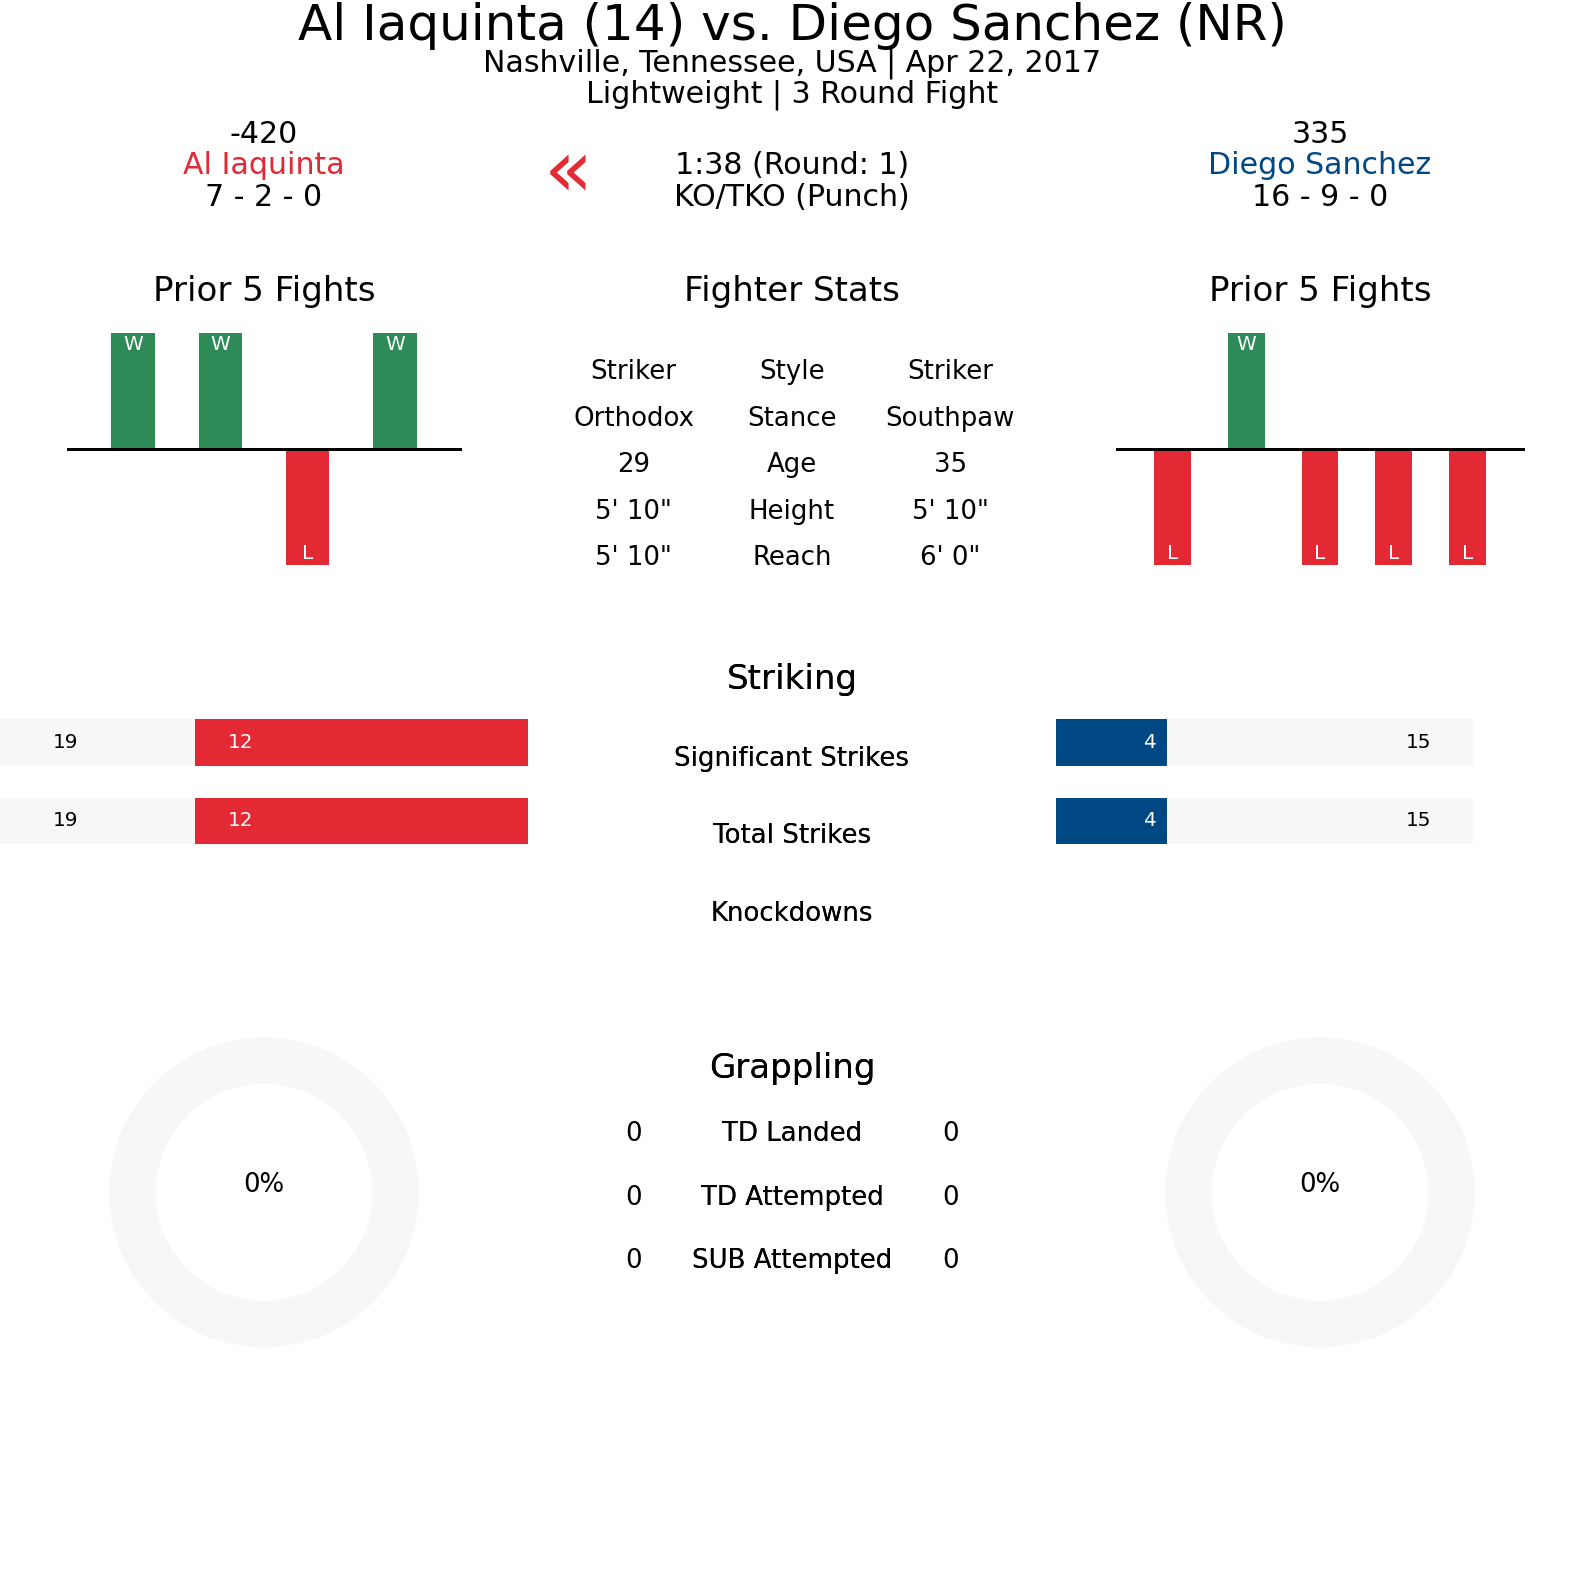

In [17]:
try:
    display(pn.Column(dash_main()).servable())
except IndexError:
    plt.close()
    print('Please Select A Fight')